# EPID - Embedded Proportional-Integral-Derivative (PID) controller

Testing the C library **EPID v1.0.0** by simulation of heating 100g of grams of water by variable RMS ohmic heating.

---

Portable implementation of "Type-C PID controller"[*] for both hosted
and freestanding C environments with a flexible API that allow the usage of
third-party external and/or internal filter(s) for a better control
backed with errors and exceptions handling.

\[\*\]: D. M. Auslander, Y. Takahashi and M. Tomizuka, "Direct digital process
control: Practice and algorithms for microprocessor application,"
in Proceedings of the IEEE, vol. 66, no. 2, pp. 199-208, Feb. 1978,
doi: 10.1109/PROC.1978.10870.

### Test parameters:
- Controller (PI/PID): PID.
- Kp gain: 500
- Ki gain: 10
- Kd gain: 200
- Sample period: 0.1s
- Deadband: 0 (Off)
- PID output min: 0
- PID output max: 500
- Heater max power in Watts: 500
- simulation time: 360s (6min)
- No I-term anti-windup, No D-term noise filter.
---

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
# For Jupyter notebook, include:
%matplotlib inline

In [2]:
os.system("gcc -std=c99 -O2 -Wall -Wextra -pedantic main.c -lm -o pid.bin") # Compile the test source-code
os.system("./pid.bin > pid.csv 2>&1") # Execute and save the output as an CSV file.

df = pd.read_csv("pid.csv", delimiter="\t") # Load the CSV output data
df.describe() # Show various statistics

,Time (s),System Sensor (C),Controller Output (W),PID Delta
count,3600.000000,3600.000000,3600.000000,3600.000000
mean,179.950000,70.395912,80.635134,21.457541
std,103.937481,10.910576,162.802435,117.007370
min,0.000000,20.000000,0.000000,-1413.571533
25%,89.975000,69.990005,7.015190,-2.861691
50%,179.950000,75.000038,9.308929,-0.005073
75%,269.925000,76.304813,19.044041,0.000305
max,359.900000,77.000000,500.000000,4970.000000


---
<!---
# Delete first X-sec from time
to_delete = 0
sample_period = 0.1
from math import floor as floor
df = df.iloc[floor(to_delete/sample_period):]
-->

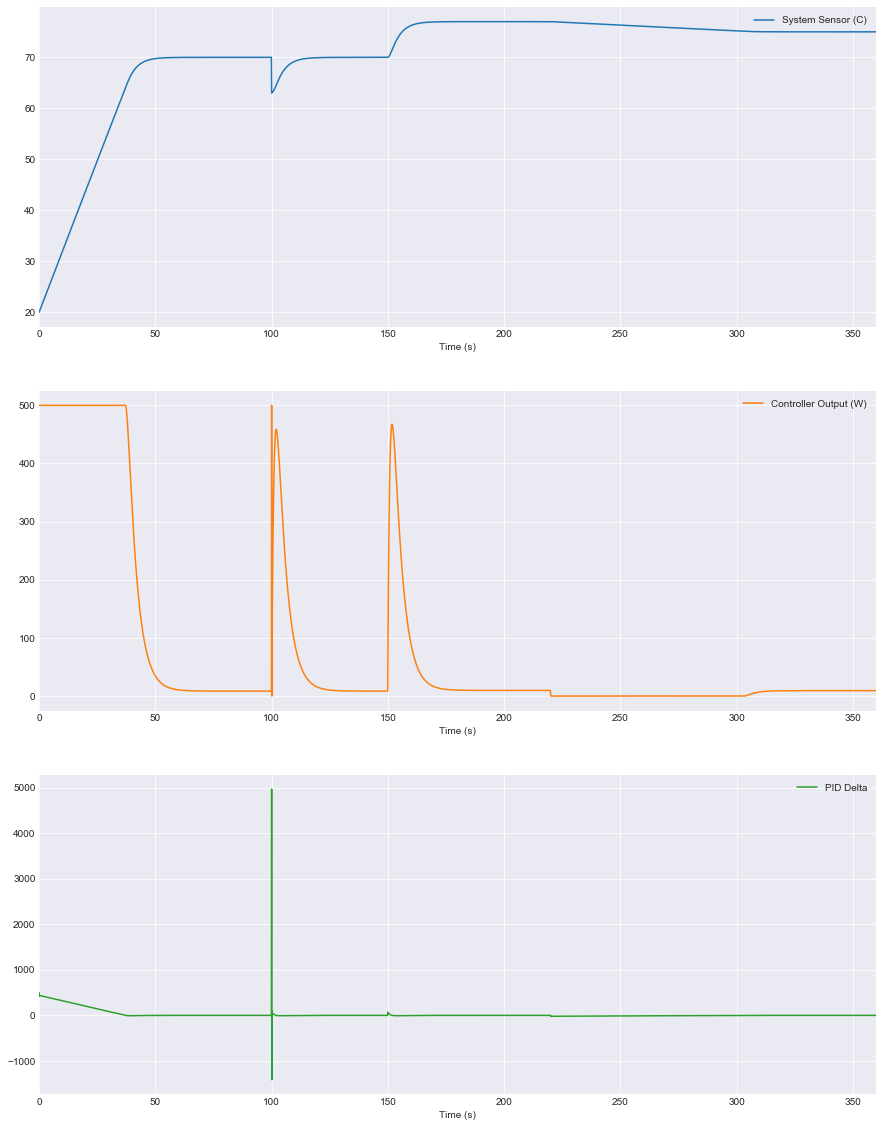

In [3]:
# Plot:
# f(t)="System Sensor (C)", g(t)="Controller Output (W)", d(t)="PID Delta"

plt.style.use('seaborn-darkgrid')
ax = df.plot(x="Time (s)", kind='line', subplots=True, 
             linewidth=1.5, grid=True, sharex=False, figsize=(15, 20))

- **T=0s**:   Command heating from *20°C* to *70°C*.
- **T=100s**: Simulate putting cold water in the hot container (heat go down by 7°C*).
- **T=150s**: Simulate higher setpoint change to *77°C*.
- **T=220s**: Simulate lower setpoint change to *75°C*.

*2020-08-14*

---